In [1]:
!wget https://dwz.cn/ijPVPQhz # 从链接下载,也可以
!sudo apt-get install rar unrar #安装 unrar用来解包
!unrar x ijPVPQhz
!cp -r AI研习社_鸟类识别比赛数据集/* ./
## 解压复制以后 手动替换修改改过的标签文件train_pname_toindex.csv 和 val_pname_toindex.csv 或者 把整理好的数据包放云盘直接导入

流式输出内容被截断，只能显示最后 5000 行内容。
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_5582.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_6041.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_6167.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_665.jpg        57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_6884.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_7407.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_7579.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_758.jpg        57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_8067.jpg       57%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sparrow_8168.jpg       58%  OK 
Extracting  AI研习社_鸟类识别比赛数据集/train_set/124.Le_Conte_Sp

In [1]:
import os

train_set_dir = "train_set/"
val_set_dir = "val_set/"
test_set_dir = "test_set/"

print(len(os.listdir(train_set_dir)))
print(len(os.listdir(test_set_dir)))
print(len(os.listdir(test_set_dir)))

8251
1768
1768


### 探索数据

In [2]:
import os

bird_dir = "/content/"
x_train_path = os.path.join(bird_dir,"train_set")
x_test_path = os.path.join(bird_dir,"test_set")
x_valid_path = os.path.join(bird_dir,"val_set")

y_train_path = os.path.join(bird_dir,"train_pname_to_index.csv")
y_valid_path = os.path.join(bird_dir,"val_pname_to_index.csv")

In [3]:
import pandas as pd

y_train = pd.read_csv(y_train_path,skiprows=0)
y_valid = pd.read_csv(y_valid_path,skiprows=0)

In [4]:
y_train.head()

,img_path,label
0,163.Cape_May_Warbler_1.jpg,163
1,141.Artic_Tern_2.jpg,141
2,183.Northern_Waterthrush_3.jpg,183
3,068.Ruby_throated_Hummingbird_4.jpg,68
4,128.Seaside_Sparrow_5.jpg,128


In [5]:
y_valid.head()

,img_path,label
0,003.Sooty_Albatross_1.jpg,3
1,074.Florida_Jay_2.jpg,74
2,108.White_necked_Raven_3.jpg,108
3,024.Red_faced_Cormorant_4.jpg,24
4,003.Sooty_Albatross_5.jpg,3


In [6]:
x_train_img_path = y_train["img_path"]
y_train = y_train["label"] - 1
x_valid_img_path = y_valid["img_path"]
y_valid = y_valid["label"] -1

print(x_train_img_path[:5])
print(y_train[:5])

print(x_valid_img_path[:5])
print(y_valid[:5])

0             163.Cape_May_Warbler_1.jpg
1                   141.Artic_Tern_2.jpg
2         183.Northern_Waterthrush_3.jpg
3    068.Ruby_throated_Hummingbird_4.jpg
4              128.Seaside_Sparrow_5.jpg
Name: img_path, dtype: object
0    162
1    140
2    182
3     67
4    127
Name: label, dtype: int64
0        003.Sooty_Albatross_1.jpg
1            074.Florida_Jay_2.jpg
2     108.White_necked_Raven_3.jpg
3    024.Red_faced_Cormorant_4.jpg
4        003.Sooty_Albatross_5.jpg
Name: img_path, dtype: object
0      2
1     73
2    107
3     23
4      2
Name: label, dtype: int64


In [7]:
# 定义读取图片函数
import cv2
import numpy as np

def get_img(file_path,img_rows,img_cols):
  
    img = cv2.imread(file_path)
    img = cv2.resize(img,(img_rows,img_cols))
    if img.shape[2] == 1:
      img = np.dstack([img,img,img])
    else:
      img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)
    
    return img

In [8]:
# 加载训练集
x_train = []
for img_name in x_train_img_path:
    img = get_img(os.path.join(x_train_path,img_name),224,224)
    x_train.append(img)

x_train = np.array(x_train,np.float32)

In [9]:
# 加载验证集
x_valid = []
for img_name in x_valid_img_path:
    img = get_img(os.path.join(x_valid_path,img_name),224,224)
    x_valid.append(img)

x_valid = np.array(x_valid,np.float32)

In [10]:
# 加载预测集
import re

x_test_img_path = os.listdir(x_test_path)
x_test_img_path = sorted(x_test_img_path,key = lambda i:int(re.match(r"(\d+)",i).group()))


x_test = []
for img_name in x_test_img_path:
    img = get_img(os.path.join(x_test_path,img_name),224,224)
    x_test.append(img)

x_test = np.array(x_test,np.float32)

In [11]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

# print(x_test.shape)

(8251, 224, 224, 3)
(8251,)
(1768, 224, 224, 3)
(1768,)


162


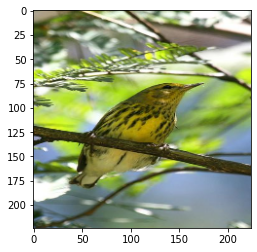

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0]/255)
print(y_train[0])

In [13]:
X_train = np.concatenate((x_train,x_valid),axis=0)
Y_train = np.concatenate((y_train,y_valid),axis=0)

print(X_train.shape)
print(Y_train.shape)


# print(x_test.shape)

(10019, 224, 224, 3)
(10019,)


In [14]:
sum = np.unique(y_train)
n_classes = len(sum)

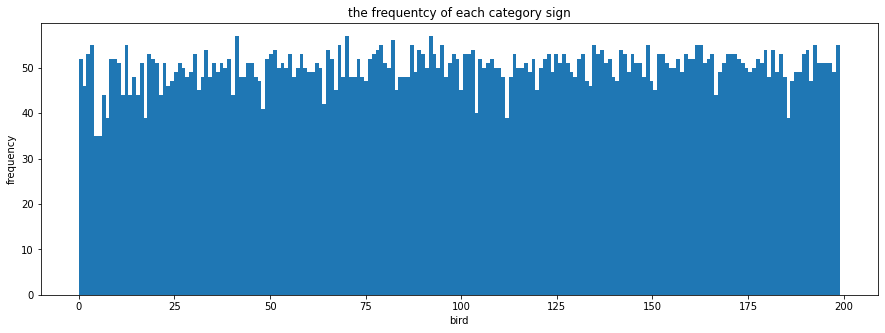

In [15]:
# 直方图来显示图像训练集的各个类别的分别情况
def plot_y_train_hist():
  fig = plt.figure(figsize=(15,5))
  ax = fig.add_subplot(1,1,1)
  hist = ax.hist(Y_train,bins=n_classes)
  ax.set_title("the frequentcy of each category sign")
  ax.set_xlabel("bird")
  ax.set_ylabel("frequency")
  plt.show()
  return hist

hist = plot_y_train_hist()

In [16]:
# 划分数据集
from sklearn.model_selection import train_test_split

x_train,x_valid,y_train,y_valid = train_test_split(X_train,Y_train,test_size=0.3,random_state=2019)



print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)

(7013, 224, 224, 3)
(7013,)
(3006, 224, 224, 3)
(3006,)
(1768, 224, 224, 3)


In [17]:
# 对标签数据进行one-hot编码

from keras.utils import np_utils
#Y_train = np_utils.to_categorical(Y_train,n_classes)
y_train = np_utils.to_categorical(y_train,n_classes)
y_valid = np_utils.to_categorical(y_valid,n_classes)
print("Shape after one-hot encoding:",y_train.shape)
print("Shape after one-hot encoding:",y_valid.shape)

Shape after one-hot encoding: (7013, 200)
Shape after one-hot encoding: (3006, 200)


### 模型

In [18]:
# 导入开发需要的库
from keras import optimizers, Input
from keras.applications import  imagenet_utils

from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.applications import *

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [19]:
# 绘制训练过程中的 loss 和 acc 变化曲线
import matplotlib.pyplot as plt
%matplotlib inline

def history_plot(history_fit):
    plt.figure(figsize=(12,6))
    
    # summarize history for accuracy
    plt.subplot(121)
    plt.plot(history_fit.history["accuracy"])
    plt.plot(history_fit.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "valid"], loc="upper left")
    
    # summarize history for loss
    plt.subplot(122)
    plt.plot(history_fit.history["loss"])
    plt.plot(history_fit.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "test"], loc="upper left")
    
    plt.show()

In [20]:
# fine-tune 模型
def fine_tune_model(model, optimizer, batch_size, epochs, freeze_num):
    '''
    discription: 对指定预训练模型进行fine-tune，并保存为.hdf5格式
    
    MODEL：传入的模型，VGG16， ResNet50, ...

    optimizer: fine-tune all layers 的优化器, first part默认用adadelta
    batch_size: 每一批的尺寸，建议32/64/128
    epochs: fine-tune all layers的代数
    freeze_num: first part冻结卷积层的数量
    '''

    # datagen = ImageDataGenerator(
    #     rescale=1.255,
    #     # shear_range=0.2,
    #     # zoom_range=0.2,
    #     # horizontal_flip=True,
    #     # vertical_flip=True,
    #     # fill_mode="nearest"
    #   )
    
    # datagen.fit(X_train)
    
    
    # first: 仅训练全连接层（权重随机初始化的）
    # 冻结所有卷积层
    
    for layer in model.layers[:freeze_num]:
        layer.trainable = False
    
    model.compile(optimizer=optimizer, 
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    # model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
    #                     steps_per_epoch=len(x_train)/32,
    #                     epochs=3,
    #                     shuffle=True,
    #                     verbose=1,
    #                     datagen.flow(x_valid, y_valid))
    model.fit(x_train,
         y_train,
         batch_size=batch_size,
         epochs=3,
         shuffle=True,
         verbose=1,
         validation_data=(x_valid,y_valid)
        )
    print('Finish step_1')
    
    
    # second: fine-tune all layers
    for layer in model.layers[freeze_num:]:
        layer.trainable = True
    
    rc = ReduceLROnPlateau(monitor="val_loss",
                factor=0.2,
                patience=3,
                verbose=1,
                mode='min')

    model_name = model.name  + ".hdf5"
    mc = ModelCheckpoint(model_name, 
               monitor="val_loss", 
               save_best_only=True,
               verbose=1,
               mode='min')
    el = EarlyStopping(monitor="val_loss",
              min_delta=0,
              patience=5,
              verbose=1,
              restore_best_weights=True)
    
    model.compile(optimizer=optimizer, 
           loss='categorical_crossentropy', 
           metrics=["accuracy"])

    # history_fit = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
    #                                  steps_per_epoch=len(x_train)/32,
    #                                  epochs=epochs,
    #                                  shuffle=True,
    #                                  verbose=1,
    #                                  callbacks=[mc,rc,el],
    #                                  datagen.flow(x_valid, y_valid))
    history_fit = model.fit(x_train,
                 y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 shuffle=True,
                 verbose=1,
                 validation_data=(x_valid,y_valid),
                 callbacks=[mc,rc,el])
    
    print('Finish fine-tune')
    return history_fit

In [21]:
# 定义一个VGG16的模型
def vgg16_model(img_rows,img_cols):
  x = Input(shape=(img_rows, img_cols, 3))
  x = Lambda(imagenet_utils.preprocess_input)(x)
  base_model = VGG16(input_tensor=x,weights="imagenet",include_top=False, pooling='avg')
  x = base_model.output
  x = Dense(1024,activation="relu",name="fc1")(x)
  x = Dropout(0.5)(x)
  predictions = Dense(n_classes,activation="softmax",name="predictions")(x)

  vgg16_model = Model(inputs=base_model.input,outputs=predictions,name="vgg16")
  
  return vgg16_model

In [22]:
# 创建VGG16模型
img_rows, img_cols = 224, 224
vgg16_model = vgg16_model(img_rows,img_cols)

In [23]:
for i,layer in enumerate(vgg16_model.layers):
  print(i,layer.name)

0 input_1
1 lambda
2 block1_conv1
3 block1_conv2
4 block1_pool
5 block2_conv1
6 block2_conv2
7 block2_pool
8 block3_conv1
9 block3_conv2
10 block3_conv3
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_pool
16 block5_conv1
17 block5_conv2
18 block5_conv3
19 block5_pool
20 global_average_pooling2d
21 fc1
22 dropout
23 predictions


In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584

In [ ]:
optimizer = optimizers.Adam(lr=0.0001)
batch_size = 32
epochs = 30
freeze_num = 21


%time vgg16_history = fine_tune_model(vgg16_model,optimizer,batch_size,epochs,freeze_num)

Epoch 1/3
220/220 [==============================] - 21s 97ms/step - loss: 8.8205 - accuracy: 0.0171 - val_loss: 4.7035 - val_accuracy: 0.0755
Epoch 2/3
 94/220 [===========>..................] - ETA: 7s - loss: 5.2474 - accuracy: 0.0539

In [ ]:
history_plot(vgg16_history)